In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import math
import warnings
warnings.filterwarnings('ignore')

Reference Links - 
https://computersciencesource.wordpress.com/2010/09/03/computer-vision-the-integral-image/#:~:text=The%20Integral%20Image%20is%20used,intensity%20within%20a%20given%20image. 

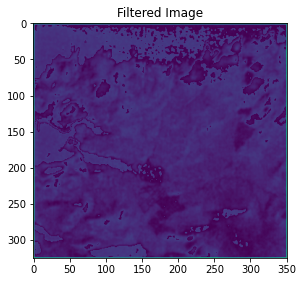

In [2]:
def FastAverage(I,w):
    integral = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            
            sumof = [(i-1,j),(i,j-1)]
            
            toremove=[]
            for k in sumof: 
                if k[0]<0 or k[0]>I.shape[0]-1 or k[1]<0 or k[1]>I.shape[1]-1:
                    toremove.append(k)
            for k in toremove:
                sumof.remove(k)

                    
            for k in sumof:
                integral[i,j] = integral[i,j] + integral[k[0],k[1]]
                
            if i-1<0 or j-1<0:
                continue
            else:
                integral[i,j] = integral[i,j] - integral[i-1,j-1]
                
    for i in range(w//2+1,I.shape[0]-w//2):
        for j in range(w//2+1,I.shape[1]-w//2):
            #print()
            #print("for ",i,j)
            x=i+w//2
            y=j+w//2
            A = (x-w,y-w)
            B = (x-w,y)
            C = (x,y-w)
            D = (x,y)

            
            temp=integral[x,y]
            
            if A[0]>0 or A[0]<I.shape[0]-1 or A[1]>0 or A[1]<I.shape[1]-1:
                temp = temp + integral[A[0],A[1]]
            else:
                continue
            if B[0]>0 or B[0]<I.shape[0]-1 or B[1]>0 or B[1]<I.shape[1]-1:
                temp = temp - integral[B[0],B[1]]
            else:
                continue
            if C[0]>0 or C[0]<I.shape[0]-1 or C[1]>0 or C[1]<I.shape[1]-1:
                temp = temp - integral[C[0],C[1]]
            else:
                continue

            I[i][j] = (temp) / (w**2)
            
    return (I)
    
I = cv2.imread("low.tif",-1)

filtered = FastAverage(I.copy(),3)
fig=plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(2,2,2)   
ax1.title.set_text("Filtered Image")
plt.imshow(filtered)